In [1]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/77318807/how-to-estimate-the-snr-with-limited-knowledge-of-the-signal?noredirect=1#comment136310154_77318807

In [3]:
fs = 12000
t = 505/fs
f = 500
samples = np.arange(t * fs) / fs
signal = np.sin(2 * np.pi * f * samples)

In [4]:
np.random.seed(12345)
noise = 0.25*np.random.normal(size=signal.size)

In [5]:
def rms(x):
    return np.sqrt(np.sum(x**2)/x.size)

In [6]:
SNR = (rms(signal)/rms(noise))**2
SNR

7.76816527364244

In [7]:
dt = np.diff(samples)[0]
G = fft.fft(signal + noise)
freq = fft.fftfreq(G.size, dt)

In [8]:
q = np.abs(np.abs(freq) - f) <= 20.

In [9]:
F = np.zeros(G.size)
F[q] = 1.

In [10]:
Gf = G*F
Nf = G*(1-F)

In [11]:
def power(X):
    return np.sum(np.real(X*np.conj(X)))

In [12]:
SNR2 = power(Gf)/power(Nf)

In [13]:
SNR2

7.600875978410159

In [14]:
signalf = np.real(fft.ifft(Gf))

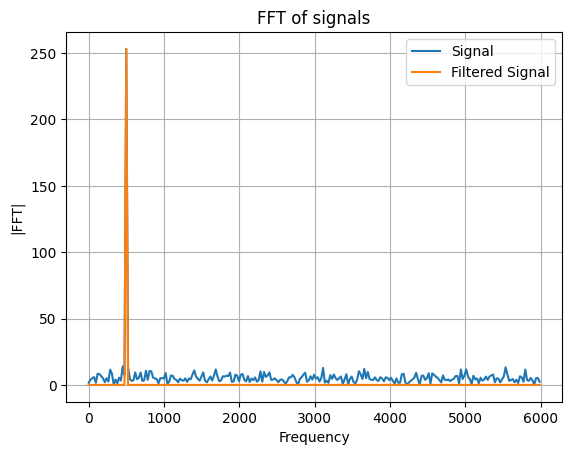

In [20]:
fig, axe = plt.subplots()
axe.plot(fft.fftshift(freq)[G.size//2:], fft.fftshift(np.abs(G))[G.size//2:], label="Signal")
axe.plot(fft.fftshift(freq)[G.size//2:], fft.fftshift(np.abs(Gf))[G.size//2:], label="Filtered Signal")
#axe.plot(fft.fftshift(freq)[G.size//2:], fft.fftshift((Nf))[G.size//2:])
axe.set_title("FFT of signals")
axe.set_xlabel("Frequency")
axe.set_ylabel("|FFT|")
axe.legend()
axe.grid()

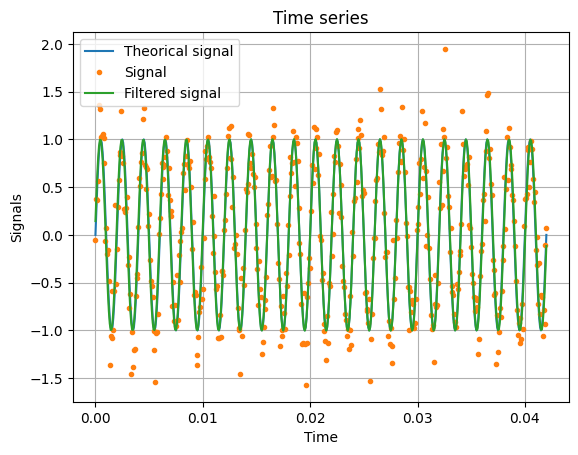

In [24]:
fig, axe = plt.subplots()
axe.plot(samples, signal, label="Theorical signal")
axe.plot(samples, signal + noise, linestyle="none", marker=".", label="Signal")
axe.plot(samples, signalf, label="Filtered signal")
axe.set_title("Time series")
axe.set_xlabel("Time")
axe.set_ylabel("Signals")
axe.legend()
axe.grid()